In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('digits.csv')
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

In [5]:
df['number_label'].value_counts()

number_label
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [6]:
#create a new DF called as pixels by dropping the label column

pixel = df.drop('number_label',axis=1)
pixel.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


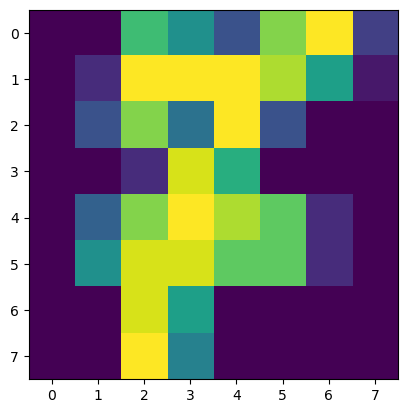

In [13]:
#displaying a image

sample = pixel.iloc[1113].to_numpy().reshape(8,8)
plt.imshow(sample)

In [17]:
#scaling of data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_pixels = sc.fit_transform(pixel)

In [40]:
#PCA

from sklearn.decomposition import PCA

pca_model = PCA(n_components=49)
pca_pixels = pca_model.fit_transform(sc_pixels)

In [41]:
#how much variance is explained by 2 pca

np.sum(pca_model.explained_variance_ratio_)

0.9804131758629999

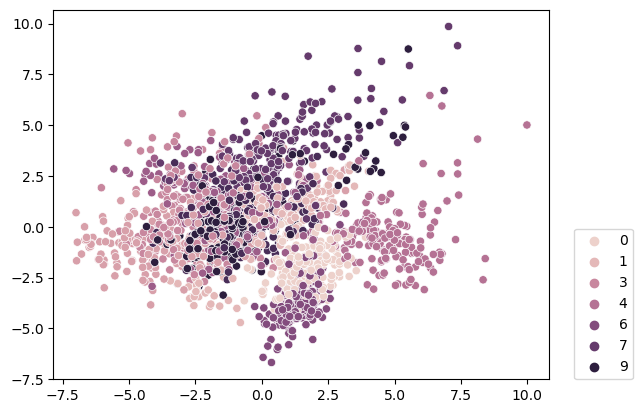

In [42]:
labels = df['number_label'].values
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue=labels)
plt.legend(loc=(1.05,0))

In [43]:
pca_pixels

array([[ 1.91421366, -0.95450158, -3.94603482, ...,  0.09234212,
         0.41691044, -0.17569139],
       [ 0.58898033,  0.92463581,  3.92475494, ..., -0.52778994,
        -0.13575328, -0.11545527],
       [ 1.30203906, -0.31718882,  3.02333294, ..., -0.55967587,
         0.34370431,  0.17900278],
       ...,
       [ 1.02259599, -0.14791086,  2.46997366, ..., -0.20075875,
        -0.8428756 , -0.22639059],
       [ 1.07605522, -0.38090625, -2.45548693, ..., -0.32616665,
        -0.42000905,  0.1121544 ],
       [-1.25770234, -2.22759086,  0.28362789, ...,  0.45821782,
        -0.55855341,  0.48271054]])